## Model Optimization for Diverse Classification Tasks

---
#### 1. Dataset Cleaning & Processing for BrinjalFruitX
---

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import json

# --- 1. Configuration ---
# Define paths and parameters
RAW_DATA_DIR = os.path.join('raw_data', 'BrinjalFruitX')
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
IMG_SIZE = (224, 224)
TEST_SPLIT_SIZE = 0.20 # 20% for the final test set
VALIDATION_SPLIT_SIZE = 0.125 # 10% of the original data (0.125 * 0.8 = 0.1)
RANDOM_STATE = 42 # For reproducible splits

# --- 2. Create Processed Data Directory ---
# This ensures the folder exists before we try to save files to it.
os.makedirs(PROCESSED_DIR, exist_ok=True)
print(f"Directory '{PROCESSED_DIR}' is ready.")

# --- 3. Load Images and Labels ---
images = []
labels = []

# Get class names from the folder names in the raw data directory
class_names = sorted([d for d in os.listdir(RAW_DATA_DIR) if os.path.isdir(os.path.join(RAW_DATA_DIR, d))])
# Create a mapping from class name to an integer index
label_map = {name: i for i, name in enumerate(class_names)}

print("Starting image loading and preprocessing...")
# Use tqdm for a progress bar
for class_name in tqdm(class_names, desc="Processing classes"):
    class_path = os.path.join(RAW_DATA_DIR, class_name)
    class_label = label_map[class_name]

    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is not None:
            # Convert image from BGR (OpenCV's default) to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Resize image to the standard size
            image = cv2.resize(image, IMG_SIZE)
            
            images.append(image)
            labels.append(class_label)
        else:
            print(f"Warning: Could not read image {image_path}. Skipping.")

print("Image loading complete.")

# --- 4. Convert to NumPy Arrays and Normalize ---
# Convert lists to NumPy arrays for efficient processing
images_np = np.array(images)
labels_np = np.array(labels)

# Normalize pixel values from the [0, 255] range to the [0.0, 1.0] range
images_np = images_np / 255.0

print(f"Converted to NumPy arrays. Image data shape: {images_np.shape}, Labels shape: {labels_np.shape}")

# --- 5. Split the Data ---
# First split: separate out the 20% test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images_np,
    labels_np,
    test_size=TEST_SPLIT_SIZE,
    random_state=RANDOM_STATE,
    stratify=labels_np  # Ensures class distribution is similar across splits
)

# Second split: separate the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=VALIDATION_SPLIT_SIZE, # 0.125 of the 80% results in 10% of the original data
    random_state=RANDOM_STATE,
    stratify=y_train_val # Stratify again for the validation split
)

print("Data splitting complete:")
print(f"  Training set:   {X_train.shape[0]} samples")
print(f"  Validation set: {X_val.shape[0]} samples")
print(f"  Test set:       {X_test.shape[0]} samples")

# --- 6. Save the Processed Data ---
print("Saving processed data to .npy files...")

np.save(os.path.join(PROCESSED_DIR, 'X_train.npy'), X_train)
np.save(os.path.join(PROCESSED_DIR, 'y_train.npy'), y_train)

np.save(os.path.join(PROCESSED_DIR, 'X_val.npy'), X_val)
np.save(os.path.join(PROCESSED_DIR, 'y_val.npy'), y_val)

np.save(os.path.join(PROCESSED_DIR, 'X_test.npy'), X_test)
np.save(os.path.join(PROCESSED_DIR, 'y_test.npy'), y_test)

# Save the class names/label map for later use in decoding predictions
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'w') as f:
    json.dump(class_names, f)

print("All data has been processed and saved successfully! ✅")

Directory 'processed_data' is ready.
Starting image loading and preprocessing...


Processing classes: 100%|██████████| 5/5 [00:55<00:00, 11.11s/it]


Image loading complete.
Converted to NumPy arrays. Image data shape: (1802, 224, 224, 3), Labels shape: (1802,)
Data splitting complete:
  Training set:   1260 samples
  Validation set: 181 samples
  Test set:       361 samples
Saving processed data to .npy files...
All data has been processed and saved successfully! ✅


---
#### 2. Training and Testing on Baseline Models
---

ResNet50

Loading preprocessed data...
Data loaded successfully.

Starting resnet50_baseline model training...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.3108 - loss: 1.8541 - val_accuracy: 0.4199 - val_loss: 1.4359
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.3488 - loss: 1.5640 - val_accuracy: 0.4033 - val_loss: 1.4110
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.4052 - loss: 1.4664 - val_accuracy: 0.4586 - val_loss: 1.4037
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 505ms/step - accuracy: 0.4088 - loss: 1.4211 - val_accuracy: 0.4696 - val_loss: 1.4102
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 515ms/step - accuracy: 0.4261 - loss: 1.4257 - val_accuracy: 0.5028 - val_loss: 1.3769
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 517ms/step - accuracy: 0.4275 - loss: 1.4006 - val_accuracy: 0.4751 - val_loss: 1.3947
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.4397 - loss: 1.4042 - val_accuracy: 0.4751 - val_lo

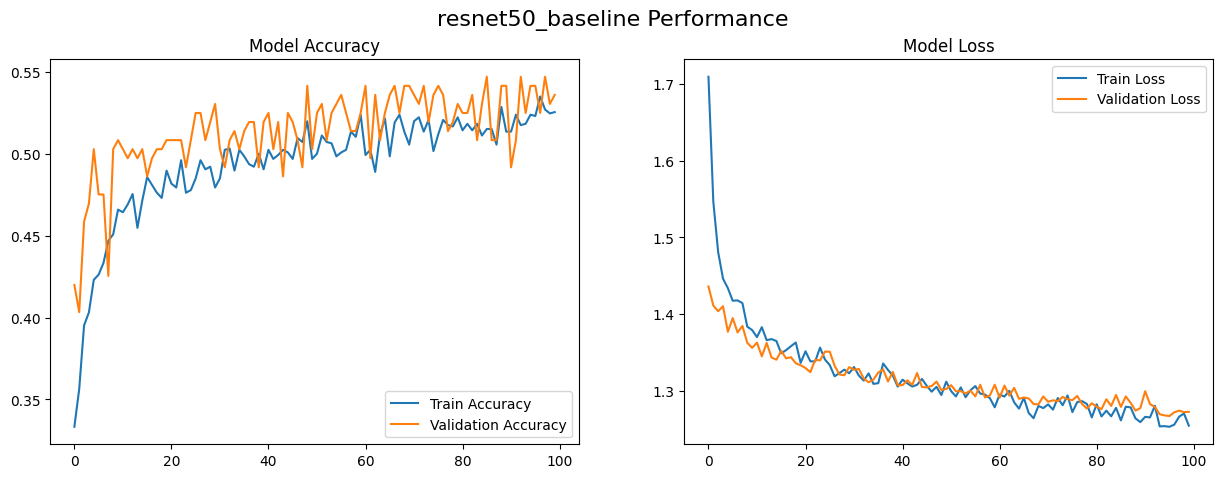


--- resnet50_baseline In-Depth Model Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step

Classification Report:

                        precision    recall  f1-score   support

Brinjal Fruit Creaking       1.00      0.07      0.14        40
        Healty Brinjal       0.48      0.57      0.52       103
      Phomopsis Bright       0.00      0.00      0.00        32
 Shoot and Fruit Borer       0.54      0.87      0.66       145
               Wet Rot       0.00      0.00      0.00        41

              accuracy                           0.52       361
             macro avg       0.40      0.30      0.27       361
          weighted avg       0.46      0.52      0.43       361

Classification report saved to results\resnet50_baseline\classification_report.csv


c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.p

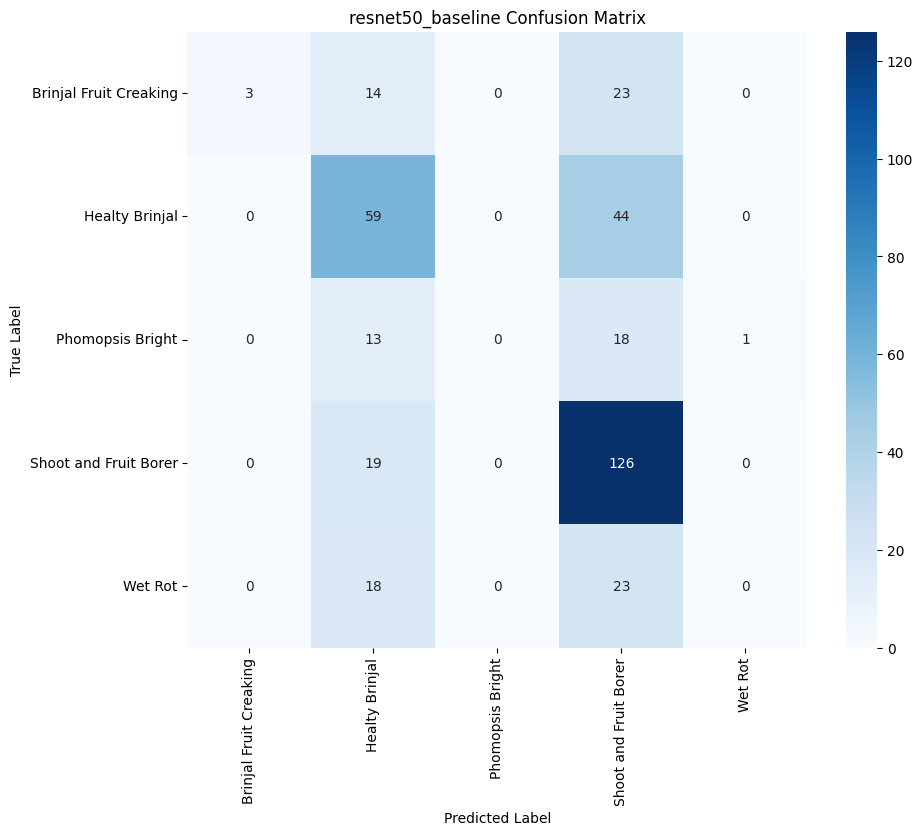


Updating summary results file...
Created new summary results file at results\summary_results.csv

Baseline resnet50_baseline model saved to 'models/resnet50_baseline.keras'


In [ ]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50 # Changed import

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- 1. Configuration and Setup ---
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
RESULTS_DIR = 'results'
MODEL_NAME = 'resnet50_baseline' # Changed for this model

# Create a specific directory for this model's results
model_results_dir = os.path.join(RESULTS_DIR, MODEL_NAME)
os.makedirs(model_results_dir, exist_ok=True)

print("Loading preprocessed data...")
# ... (data loading code remains the same) ...
X_train = np.load(os.path.join(PROCESSED_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DIR, 'y_test.npy'))
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'r') as f:
    class_names = json.load(f)
print("Data loaded successfully.")

# --- 2. Define and Train the Model (ResNet50) ---
EPOCHS = 100 # You can set this back to 100 for your experiment
BATCH_SIZE = 32

base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # Changed base model
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(f"\nStarting {MODEL_NAME} model training...")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))
print("Model training complete.")

# --- 3. Visualize Performance and Save Figure ---
print("\nGenerating and saving performance plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'{MODEL_NAME} Performance', fontsize=16)
# Plot accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend(loc='lower right')
# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend(loc='upper right')
# Save the figure
plt.savefig(os.path.join(model_results_dir, 'accuracy_loss_plot.png'))
plt.show()

# --- 4. In-Depth Evaluation and Save Results ---
print(f"\n--- {MODEL_NAME} In-Depth Model Evaluation ---")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate and print classification report
report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Save classification report to CSV
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(model_results_dir, 'classification_report.csv'))
print(f"Classification report saved to {os.path.join(model_results_dir, 'classification_report.csv')}")

# Generate, plot, and save confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{MODEL_NAME} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(model_results_dir, 'confusion_matrix.png'))
plt.show()

# --- 5. Update Summary Results File ---
print("\nUpdating summary results file...")
summary_file = os.path.join(RESULTS_DIR, 'summary_results.csv')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

summary_data = {
    'model_name': MODEL_NAME,
    'test_accuracy': f"{test_accuracy:.4f}",
    'test_loss': f"{test_loss:.4f}",
    'macro_avg_f1-score': f"{report_dict['macro avg']['f1-score']:.4f}",
    'weighted_avg_f1-score': f"{report_dict['weighted avg']['f1-score']:.4f}"
}
new_results_df = pd.DataFrame([summary_data])

if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
    if MODEL_NAME not in summary_df['model_name'].values:
        summary_df = pd.concat([summary_df, new_results_df], ignore_index=True)
        summary_df.to_csv(summary_file, index=False)
        print(f"Appended new results to {summary_file}")
    else: # If model name exists, update the row
        summary_df.loc[summary_df['model_name'] == MODEL_NAME, list(summary_data.keys())] = list(summary_data.values())
        summary_df.to_csv(summary_file, index=False)
        print(f"Updated results for {MODEL_NAME} in {summary_file}")
else:
    new_results_df.to_csv(summary_file, index=False)
    print(f"Created new summary results file at {summary_file}")


# --- 6. Save the Trained Model ---
os.makedirs('models', exist_ok=True)
model.save(f'models/{MODEL_NAME}.keras')
print(f"\nBaseline {MODEL_NAME} model saved to 'models/{MODEL_NAME}.keras'")

VGG16

Loading preprocessed data...
Data loaded successfully.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

Starting vgg16_baseline model training...
Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 861ms/step - accuracy: 0.2628 - loss: 1.6281 - val_accuracy: 0.4420 - val_loss: 1.3988
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 881ms/step - accuracy: 0.4320 - loss: 1.3913 - val_accuracy: 0.4641 - val_loss: 1.3406
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 877ms/step - accuracy: 0.4795 - loss: 1.3499 - val_accuracy: 0.4696 - val_loss: 1.2914
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 879ms/step - accuracy: 0.5218 - loss: 1.2822 - val_accuracy: 0.4917 - val_loss: 1.2552
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 882ms/step - accuracy: 0.5030 - loss: 1.2984 - val_accuracy: 0.5083 - val_loss: 1.2236
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 881ms/step - accuracy: 0.5456 - loss: 1.2393 - val_accuracy: 0.5138 - val_loss: 1.1969
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 887ms/step - accuracy: 0.5728 - los

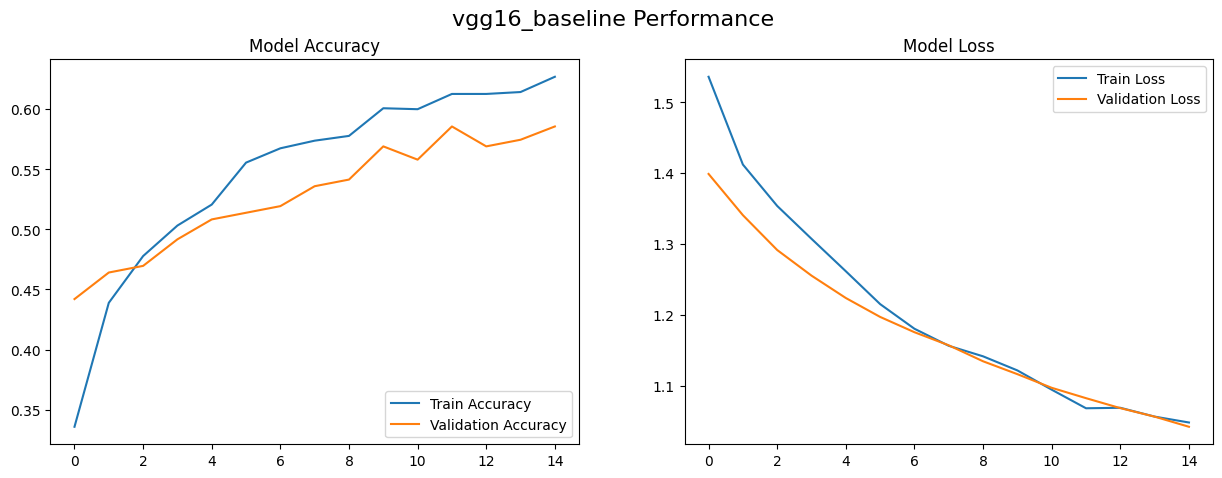


--- vgg16_baseline In-Depth Model Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 736ms/step

Classification Report:

                        precision    recall  f1-score   support

Brinjal Fruit Creaking       0.00      0.00      0.00        40
        Healty Brinjal       0.62      0.83      0.71       103
      Phomopsis Bright       0.00      0.00      0.00        32
 Shoot and Fruit Borer       0.65      0.88      0.74       145
               Wet Rot       0.65      0.41      0.51        41

              accuracy                           0.64       361
             macro avg       0.38      0.43      0.39       361
          weighted avg       0.51      0.64      0.56       361

Classification report saved to results\vgg16_baseline\classification_report.csv


c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.p

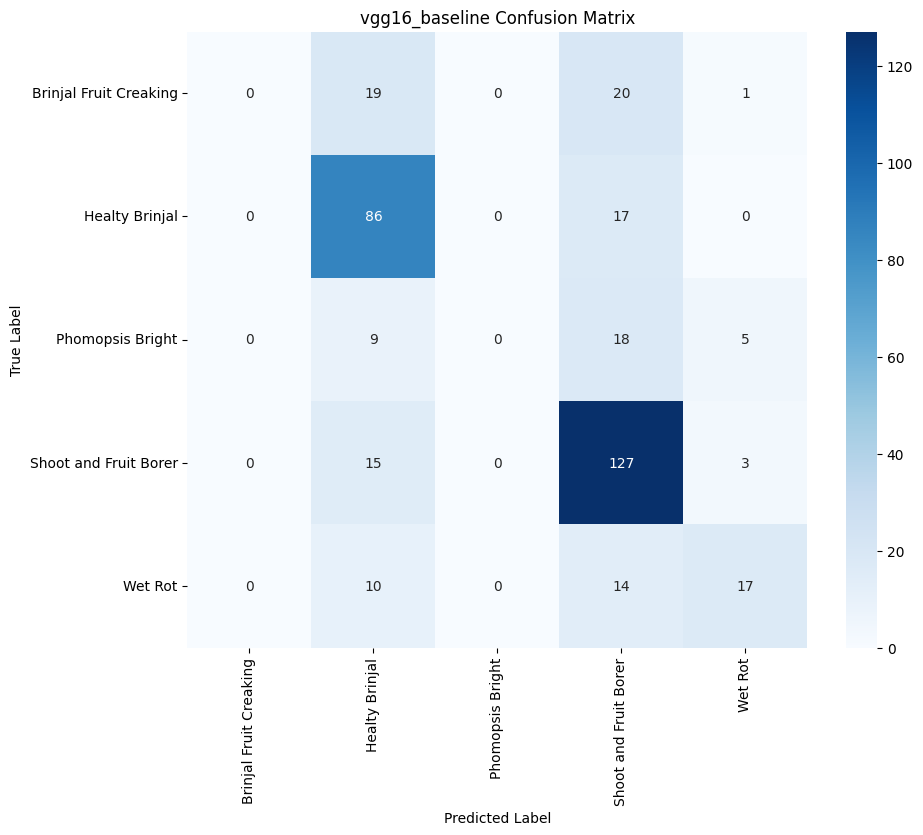


Updating summary results file...
Appended new results to results\summary_results.csv

Baseline vgg16_baseline model saved to 'models/vgg16_baseline.keras'


In [6]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# --- 1. Configuration and Setup ---
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
RESULTS_DIR = 'results'
MODEL_NAME = 'vgg16_baseline' # Set the name for the current model

# Create a specific directory for this model's results
model_results_dir = os.path.join(RESULTS_DIR, MODEL_NAME)
os.makedirs(model_results_dir, exist_ok=True)

print("Loading preprocessed data...")
X_train = np.load(os.path.join(PROCESSED_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DIR, 'y_test.npy'))
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'r') as f:
    class_names = json.load(f)
print("Data loaded successfully.")

# --- 2. Define and Train the Model (VGG16) ---
EPOCHS = 15
BATCH_SIZE = 32

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(f"\nStarting {MODEL_NAME} model training...")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))
print("Model training complete.")

# --- 3. Visualize Performance and Save Figure ---
print("\nGenerating and saving performance plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'{MODEL_NAME} Performance', fontsize=16)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend(loc='lower right')
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend(loc='upper right')
plt.savefig(os.path.join(model_results_dir, 'accuracy_loss_plot.png'))
plt.show()

# --- 4. In-Depth Evaluation and Save Results ---
print(f"\n--- {MODEL_NAME} In-Depth Model Evaluation ---")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(model_results_dir, 'classification_report.csv'))
print(f"Classification report saved to {os.path.join(model_results_dir, 'classification_report.csv')}")

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{MODEL_NAME} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(model_results_dir, 'confusion_matrix.png'))
plt.show()

# --- 5. Update Summary Results File ---
print("\nUpdating summary results file...")
summary_file = os.path.join(RESULTS_DIR, 'summary_results.csv')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

summary_data = {
    'model_name': MODEL_NAME,
    'test_accuracy': f"{test_accuracy:.4f}",
    'test_loss': f"{test_loss:.4f}",
    'macro_avg_f1-score': f"{report_dict['macro avg']['f1-score']:.4f}",
    'weighted_avg_f1-score': f"{report_dict['weighted avg']['f1-score']:.4f}"
}
new_results_df = pd.DataFrame([summary_data])

if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
    if MODEL_NAME not in summary_df['model_name'].values:
        summary_df = pd.concat([summary_df, new_results_df], ignore_index=True)
        summary_df.to_csv(summary_file, index=False)
        print(f"Appended new results to {summary_file}")
    else:
        summary_df.loc[summary_df['model_name'] == MODEL_NAME, list(summary_data.keys())] = list(summary_data.values())
        summary_df.to_csv(summary_file, index=False)
        print(f"Updated results for {MODEL_NAME} in {summary_file}")
else:
    new_results_df.to_csv(summary_file, index=False)
    print(f"Created new summary results file at {summary_file}")

# --- 6. Save the Trained Model ---
os.makedirs('models', exist_ok=True)
model.save(f'models/{MODEL_NAME}.keras')
print(f"\nBaseline {MODEL_NAME} model saved to 'models/{MODEL_NAME}.keras'")

InceptionV3|

Loading preprocessed data...
Data loaded successfully.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

Starting inceptionv3_baseline model training...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 313ms/step - accuracy: 0.3922 - loss: 1.7560 - val_accuracy: 0.7127 - val_loss: 0.8826
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.5853 - loss: 1.0643 - val_accuracy: 0.7514 - val_loss: 0.6975
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.6890 - loss: 0.8310 - val_accuracy: 0.7680 - val_loss: 0.6086
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.7302 - loss: 0.7515 - val_accuracy: 0.8287 - val_loss: 0.5909
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.7553 - loss: 0.6774 - val_accuracy: 0.8011 - val_loss: 0.5854
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.7588 - loss: 0.6508 - val_accuracy: 0.8177 - val_loss: 0.5476
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy:

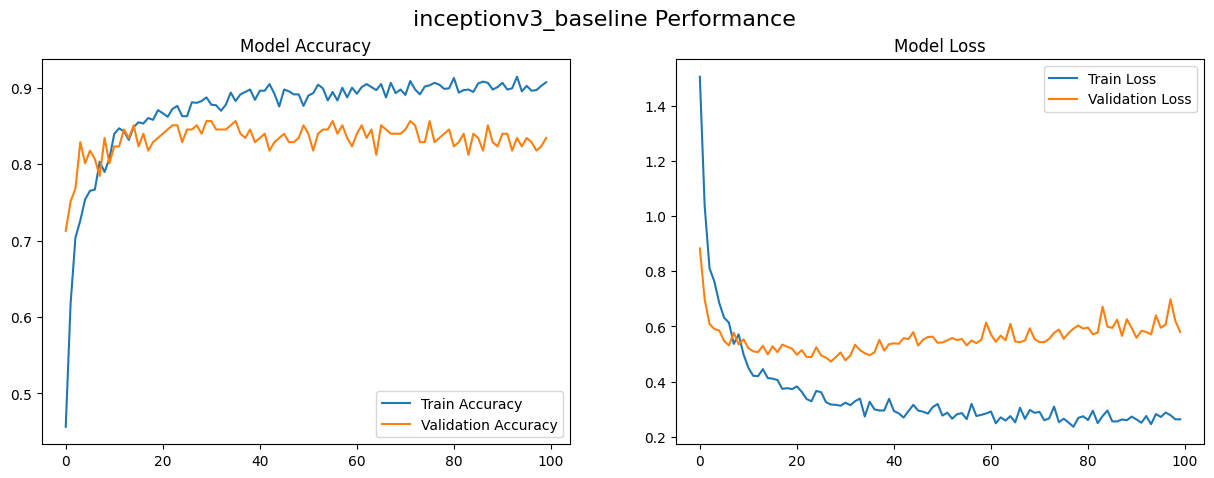


--- inceptionv3_baseline In-Depth Model Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step

Classification Report:

                        precision    recall  f1-score   support

Brinjal Fruit Creaking       0.71      0.72      0.72        40
        Healty Brinjal       0.84      0.93      0.88       103
      Phomopsis Bright       0.55      0.38      0.44        32
 Shoot and Fruit Borer       0.85      0.86      0.85       145
               Wet Rot       0.84      0.78      0.81        41

              accuracy                           0.81       361
             macro avg       0.76      0.73      0.74       361
          weighted avg       0.80      0.81      0.81       361

Classification report saved to results\inceptionv3_baseline\classification_report.csv


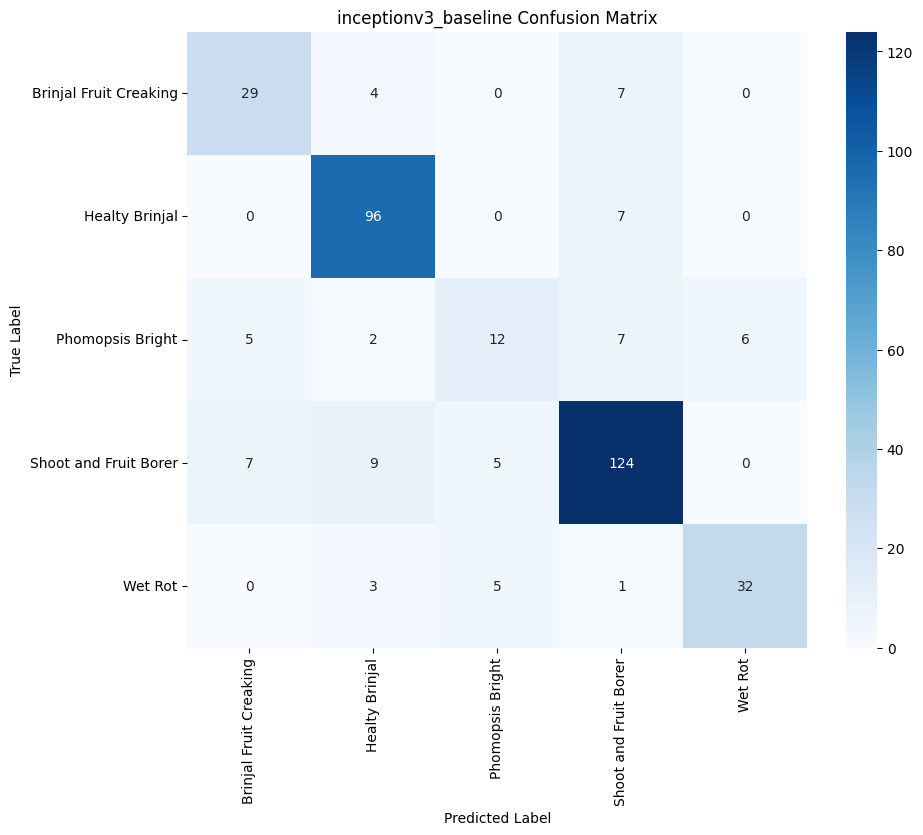


Updating summary results file...
Updated results for inceptionv3_baseline in results\summary_results.csv

Baseline inceptionv3_baseline model saved to 'models/inceptionv3_baseline.keras'


In [7]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3 # Changed import

# --- 1. Configuration and Setup ---
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
RESULTS_DIR = 'results'
MODEL_NAME = 'inceptionv3_baseline' # Changed for this model

# Create a specific directory for this model's results
model_results_dir = os.path.join(RESULTS_DIR, MODEL_NAME)
os.makedirs(model_results_dir, exist_ok=True)

print("Loading preprocessed data...")
# --- Data loading code remains the same ---
X_train = np.load(os.path.join(PROCESSED_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DIR, 'y_test.npy'))
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'r') as f:
    class_names = json.load(f)
print("Data loaded successfully.")

# --- 2. Define and Train the Model (InceptionV3) ---
EPOCHS = 100
BATCH_SIZE = 32

# Note: InceptionV3 was originally trained on 299x299 images.
# Keras automatically handles the size difference from our 224x224 inputs.
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # Changed base model
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f"\nStarting {MODEL_NAME} model training...")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))
print("Model training complete.")


# --- 3. Visualize Performance and Save Figure ---
print("\nGenerating and saving performance plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'{MODEL_NAME} Performance', fontsize=16)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend(loc='lower right')
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend(loc='upper right')
plt.savefig(os.path.join(model_results_dir, 'accuracy_loss_plot.png'))
plt.show()

# --- 4. In-Depth Evaluation and Save Results ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"\n--- {MODEL_NAME} In-Depth Model Evaluation ---")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(model_results_dir, 'classification_report.csv'))
print(f"Classification report saved to {os.path.join(model_results_dir, 'classification_report.csv')}")

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{MODEL_NAME} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(model_results_dir, 'confusion_matrix.png'))
plt.show()

# --- 5. Update Summary Results File ---
print("\nUpdating summary results file...")
summary_file = os.path.join(RESULTS_DIR, 'summary_results.csv')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

summary_data = {
    'model_name': MODEL_NAME,
    'test_accuracy': f"{test_accuracy:.4f}",
    'test_loss': f"{test_loss:.4f}",
    'macro_avg_f1-score': f"{report_dict['macro avg']['f1-score']:.4f}",
    'weighted_avg_f1-score': f"{report_dict['weighted avg']['f1-score']:.4f}"
}
new_results_df = pd.DataFrame([summary_data])

if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
    if MODEL_NAME not in summary_df['model_name'].values:
        summary_df = pd.concat([summary_df, new_results_df], ignore_index=True)
    else: # If model name exists, update the row
        summary_df.loc[summary_df['model_name'] == MODEL_NAME] = new_results_df.values
    summary_df.to_csv(summary_file, index=False)
    print(f"Updated results for {MODEL_NAME} in {summary_file}")
else:
    new_results_df.to_csv(summary_file, index=False)
    print(f"Created new summary results file at {summary_file}")


# --- 6. Save the Trained Model ---
os.makedirs('models', exist_ok=True)
model.save(f'models/{MODEL_NAME}.keras')
print(f"\nBaseline {MODEL_NAME} model saved to 'models/{MODEL_NAME}.keras'")

MobileNetV2

Loading preprocessed data...
Data loaded successfully.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Starting mobilenetv2_baseline model training...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.3722 - loss: 1.7681 - val_accuracy: 0.6630 - val_loss: 0.8536
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.6640 - loss: 0.9466 - val_accuracy: 0.7680 - val_loss: 0.6769
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.7416 - loss: 0.7514 - val_accuracy: 0.7735 - val_loss: 0.5859
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.8074 - loss: 0.5683 - val_accuracy: 0.8066 - val_loss: 0.5474
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.7931 - loss: 0.5570 - val_accuracy: 0.8287 - val_loss: 0.5141
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.8384 - loss: 0.4620 - val_accuracy: 0.8287 - val_loss: 0.5010
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.8385 

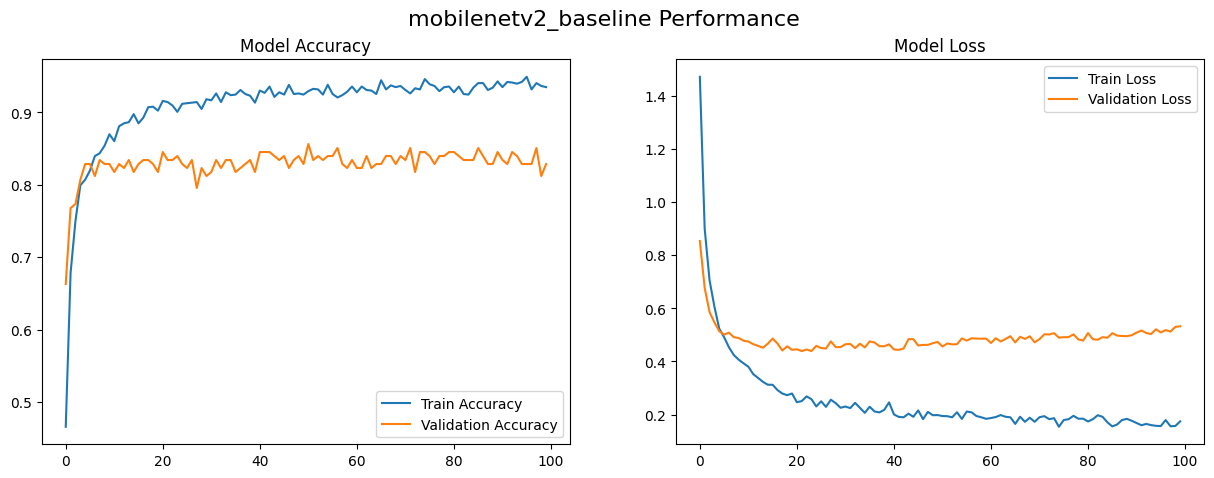


--- mobilenetv2_baseline In-Depth Model Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step

Classification Report:

                        precision    recall  f1-score   support

Brinjal Fruit Creaking       0.77      0.82      0.80        40
        Healty Brinjal       0.94      0.88      0.91       103
      Phomopsis Bright       0.69      0.56      0.62        32
 Shoot and Fruit Borer       0.86      0.92      0.89       145
               Wet Rot       0.88      0.85      0.86        41

              accuracy                           0.86       361
             macro avg       0.83      0.81      0.82       361
          weighted avg       0.86      0.86      0.86       361

Classification report saved to results\mobilenetv2_baseline\classification_report.csv


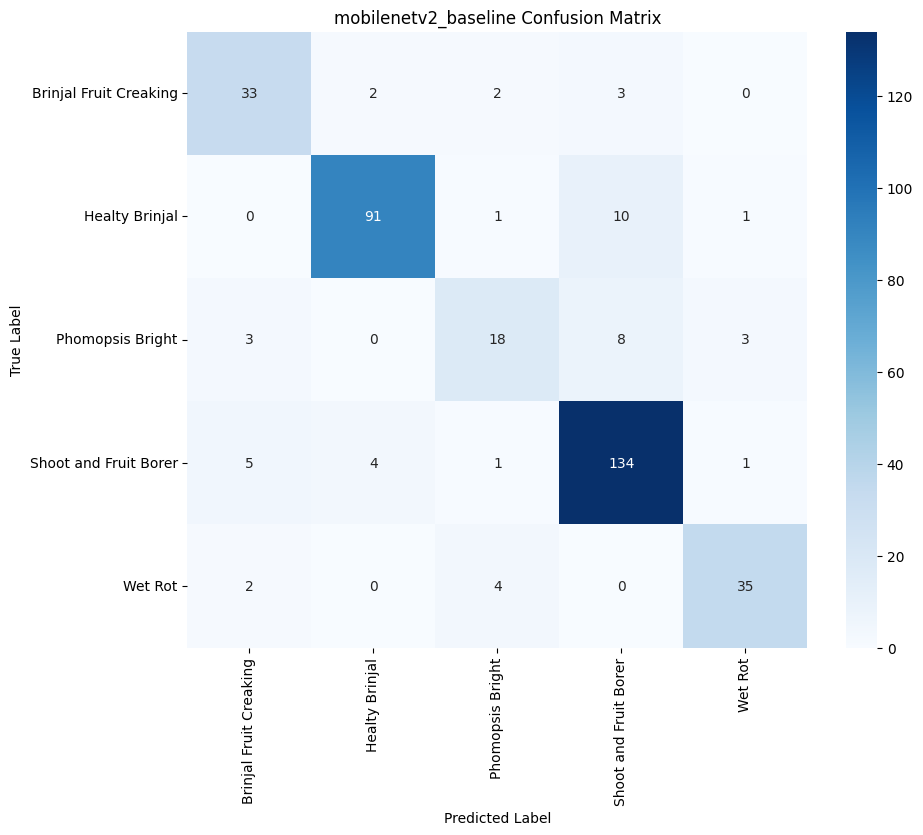


Updating summary results file...
Updated results for mobilenetv2_baseline in results\summary_results.csv

Baseline mobilenetv2_baseline model saved to 'models/mobilenetv2_baseline.keras'


In [8]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2 # Changed import

# --- 1. Configuration and Setup ---
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
RESULTS_DIR = 'results'
MODEL_NAME = 'mobilenetv2_baseline' # Changed for this model

# Create a specific directory for this model's results
model_results_dir = os.path.join(RESULTS_DIR, MODEL_NAME)
os.makedirs(model_results_dir, exist_ok=True)

print("Loading preprocessed data...")
# --- Data loading code remains the same ---
X_train = np.load(os.path.join(PROCESSED_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DIR, 'y_test.npy'))
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'r') as f:
    class_names = json.load(f)
print("Data loaded successfully.")

# --- 2. Define and Train the Model (MobileNetV2) ---
EPOCHS = 100
BATCH_SIZE = 32

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # Changed base model
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f"\nStarting {MODEL_NAME} model training...")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))
print("Model training complete.")


# --- 3. Visualize Performance and Save Figure ---
print("\nGenerating and saving performance plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'{MODEL_NAME} Performance', fontsize=16)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend(loc='lower right')
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend(loc='upper right')
plt.savefig(os.path.join(model_results_dir, 'accuracy_loss_plot.png'))
plt.show()

# --- 4. In-Depth Evaluation and Save Results ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"\n--- {MODEL_NAME} In-Depth Model Evaluation ---")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(model_results_dir, 'classification_report.csv'))
print(f"Classification report saved to {os.path.join(model_results_dir, 'classification_report.csv')}")

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{MODEL_NAME} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(model_results_dir, 'confusion_matrix.png'))
plt.show()

# --- 5. Update Summary Results File ---
print("\nUpdating summary results file...")
summary_file = os.path.join(RESULTS_DIR, 'summary_results.csv')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

summary_data = {
    'model_name': MODEL_NAME,
    'test_accuracy': f"{test_accuracy:.4f}",
    'test_loss': f"{test_loss:.4f}",
    'macro_avg_f1-score': f"{report_dict['macro avg']['f1-score']:.4f}",
    'weighted_avg_f1-score': f"{report_dict['weighted avg']['f1-score']:.4f}"
}
new_results_df = pd.DataFrame([summary_data])

if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
    if MODEL_NAME not in summary_df['model_name'].values:
        summary_df = pd.concat([summary_df, new_results_df], ignore_index=True)
    else: # If model name exists, update the row
        summary_df.loc[summary_df['model_name'] == MODEL_NAME] = new_results_df.values
    summary_df.to_csv(summary_file, index=False)
    print(f"Updated results for {MODEL_NAME} in {summary_file}")
else:
    new_results_df.to_csv(summary_file, index=False)
    print(f"Created new summary results file at {summary_file}")


# --- 6. Save the Trained Model ---
os.makedirs('models', exist_ok=True)
model.save(f'models/{MODEL_NAME}.keras')
print(f"\nBaseline {MODEL_NAME} model saved to 'models/{MODEL_NAME}.keras'")

EfficientNetB0

Loading preprocessed data...
Data loaded successfully.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Starting efficientnetb0_baseline model training...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.3281 - loss: 1.5298 - val_accuracy: 0.4033 - val_loss: 1.4383
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.3961 - loss: 1.4478 - val_accuracy: 0.4033 - val_loss: 1.4271
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.3885 - loss: 1.4632 - val_accuracy: 0.4033 - val_loss: 1.4383
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.3870 - loss: 1.4777 - val_accuracy: 0.4033 - val_loss: 1.4478
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.4062 - loss: 1.4522 - val_accuracy: 0.4033 - val_loss: 1.4314
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.3741 - loss: 1.4738 - val_accuracy: 0.4033 - val_loss: 1.4296
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accura

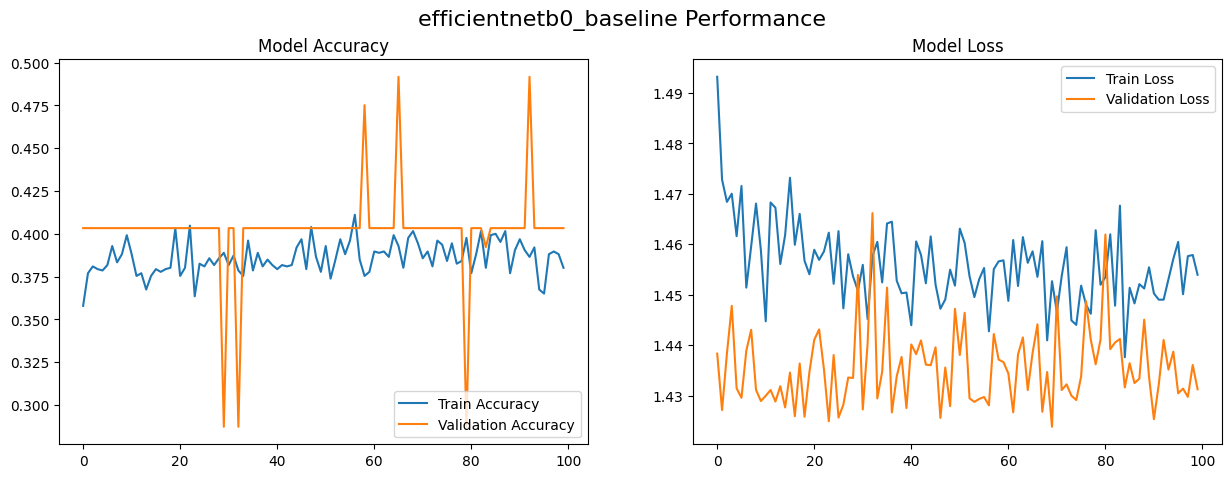


--- efficientnetb0_baseline In-Depth Model Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step

Classification Report:

                        precision    recall  f1-score   support

Brinjal Fruit Creaking       0.00      0.00      0.00        40
        Healty Brinjal       0.00      0.00      0.00       103
      Phomopsis Bright       0.00      0.00      0.00        32
 Shoot and Fruit Borer       0.40      1.00      0.57       145
               Wet Rot       0.00      0.00      0.00        41

              accuracy                           0.40       361
             macro avg       0.08      0.20      0.11       361
          weighted avg       0.16      0.40      0.23       361

Classification report saved to results\efficientnetb0_baseline\classification_report.csv


c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dr-basab\Desktop\Research Projects\A-Deep-Learning-Model-Optimization-for-Diverse-Classification-Tasks\venv\Lib\site-packages\sklearn\metrics\_classification.p

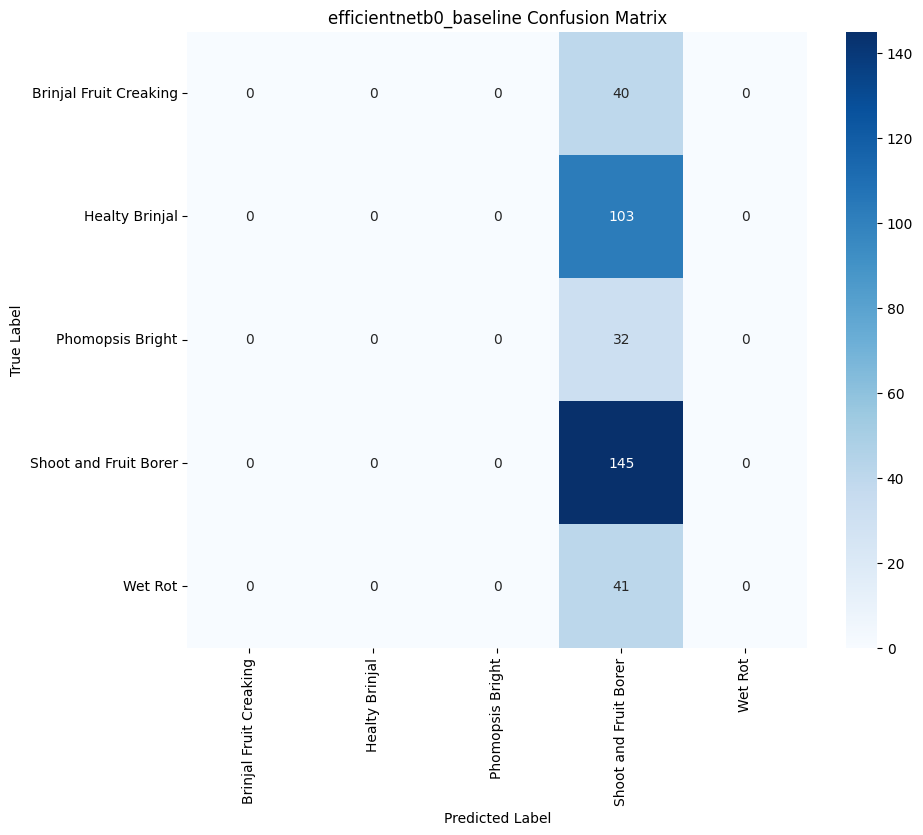


Updating summary results file...
Updated results for efficientnetb0_baseline in results\summary_results.csv

Baseline efficientnetb0_baseline model saved to 'models/efficientnetb0_baseline.keras'


In [9]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0 # Changed import

# --- 1. Configuration and Setup ---
PROCESSED_DIR = os.path.join('processed_data', 'BrinjalFruitX')
RESULTS_DIR = 'results'
MODEL_NAME = 'efficientnetb0_baseline' # Changed for this model

# Create a specific directory for this model's results
model_results_dir = os.path.join(RESULTS_DIR, MODEL_NAME)
os.makedirs(model_results_dir, exist_ok=True)

print("Loading preprocessed data...")
# --- Data loading code remains the same ---
X_train = np.load(os.path.join(PROCESSED_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DIR, 'y_test.npy'))
with open(os.path.join(PROCESSED_DIR, 'class_names.json'), 'r') as f:
    class_names = json.load(f)
print("Data loaded successfully.")

# --- 2. Define and Train the Model (EfficientNetB0) ---
EPOCHS = 100
BATCH_SIZE = 32

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # Changed base model
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f"\nStarting {MODEL_NAME} model training...")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))
print("Model training complete.")


# --- 3. Visualize Performance and Save Figure ---
print("\nGenerating and saving performance plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'{MODEL_NAME} Performance', fontsize=16)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend(loc='lower right')
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend(loc='upper right')
plt.savefig(os.path.join(model_results_dir, 'accuracy_loss_plot.png'))
plt.show()

# --- 4. In-Depth Evaluation and Save Results ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"\n--- {MODEL_NAME} In-Depth Model Evaluation ---")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(model_results_dir, 'classification_report.csv'))
print(f"Classification report saved to {os.path.join(model_results_dir, 'classification_report.csv')}")

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{MODEL_NAME} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(model_results_dir, 'confusion_matrix.png'))
plt.show()

# --- 5. Update Summary Results File ---
print("\nUpdating summary results file...")
summary_file = os.path.join(RESULTS_DIR, 'summary_results.csv')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

summary_data = {
    'model_name': MODEL_NAME,
    'test_accuracy': f"{test_accuracy:.4f}",
    'test_loss': f"{test_loss:.4f}",
    'macro_avg_f1-score': f"{report_dict['macro avg']['f1-score']:.4f}",
    'weighted_avg_f1-score': f"{report_dict['weighted avg']['f1-score']:.4f}"
}
new_results_df = pd.DataFrame([summary_data])

if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
    if MODEL_NAME not in summary_df['model_name'].values:
        summary_df = pd.concat([summary_df, new_results_df], ignore_index=True)
    else: # If model name exists, update the row
        summary_df.loc[summary_df['model_name'] == MODEL_NAME] = new_results_df.values
    summary_df.to_csv(summary_file, index=False)
    print(f"Updated results for {MODEL_NAME} in {summary_file}")
else:
    new_results_df.to_csv(summary_file, index=False)
    print(f"Created new summary results file at {summary_file}")


# --- 6. Save the Trained Model ---
os.makedirs('models', exist_ok=True)
model.save(f'models/{MODEL_NAME}.keras')
print(f"\nBaseline {MODEL_NAME} model saved to 'models/{MODEL_NAME}.keras'")